# Pandas进阶修炼120题
## 制作：刘早起
## 整理：刘早起
### 公众号：早起Python
### 请勿用于任何商业用途，侵权必究，如需请联系公众号：早起Python授权

## 第一期 Pandas基础

In [1]:
import pandas as pd
import numpy as np

### 1.将下面的字典创建为DataFrame

In [29]:
data = {"grammer":["Python","C","Java","GO",np.nan,"SQL","PHP","Python"],
       "score":[1,2,np.nan,4,5,6,7,10]}

In [30]:
df = pd.DataFrame(data)
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 2.提取含有字符串"Python"的行

In [31]:
#方法一
df[df['grammer'] == 'Python']
#方法二
results = df['grammer'].str.contains("Python")
results.fillna(value=False,inplace = True)
df[results]

,grammer,score
0,Python,1.0
7,Python,10.0


### 3.输出df的所有列名

In [7]:
print(df.columns)

Index(['grammer', 'score'], dtype='object')


### 4.修改第二列列名为'popularity'

In [8]:
df.rename(columns={'score':'popularity'}, inplace = True)
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 5.统计grammer列中每种编程语言出现的次数

In [9]:
df['grammer'].value_counts()

Python    2
GO        1
Java      1
PHP       1
C         1
SQL       1
Name: grammer, dtype: int64

### 6.将空值用上下值的平均值填充

In [10]:
df['popularity'] = df['popularity'].fillna(df['popularity'].interpolate())
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 7.提取popularity列中值大于3的行

In [11]:
df[df['popularity'] > 3]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 8.按照grammer列进行去除重复值

In [12]:
df.drop_duplicates(['grammer'])

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0


### 9.计算popularity列平均值

In [13]:
df['popularity'].mean()

4.75

### 10.将grammer列转换为list

In [14]:
df['grammer'].to_list()

['Python', 'C', 'Java', 'GO', nan, 'SQL', 'PHP', 'Python']

### 11.将DataFrame保存为EXCEL

In [ ]:
df.to_excel('test.xlsx')

### 12.查看数据行列数

In [15]:
df.shape

(8, 2)

### 13.提取popularity列值大于3小于7的行

In [16]:
df[(df['popularity'] > 3) & (df['popularity'] < 7)]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0


### 14.交换两列位置

In [18]:
'''
方法1
'''
temp = df['popularity']
df.drop(labels=['popularity'], axis=1,inplace = True)
df.insert(0, 'popularity', temp)
df
'''
方法2
cols = df.columns[[1,0]]
df = df[cols]
df
'''

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


### 15.提取popularity列最大值所在行

In [21]:
df[df['popularity'] == df['popularity'].max()]

,popularity,grammer
7,10.0,Python


### 16.查看最后5行数据

In [22]:
df.tail()

,popularity,grammer
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


### 17.删除最后一行数据

In [23]:
df.drop([len(df)-1],inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP


### 18.添加一行数据['Perl',6.6] 

In [24]:
row={'grammer':'Perl','popularity':6.6}
df = df.append(row,ignore_index=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,6.6,Perl


### 19.对数据按照"popularity"列值的大小进行排序

In [25]:
df.sort_values("popularity",inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
7,6.6,Perl
6,7.0,PHP


### 20.统计grammer列每个字符串的长度

In [27]:
df['grammer'] = df['grammer'].fillna('R')
df['len_str'] = df['grammer'].map(lambda x: len(x))
df

## 第二期 Pandas数据处理

### 21.读取本地EXCEL数据

In [11]:
import pandas as pd
df = pd.read_excel('pandas120.xlsx')

### 22.查看df数据前5行

In [12]:
df.head()

,createTime,education,salary
0,2020-03-16 11:30:18,本科,20k-35k
1,2020-03-16 10:58:48,本科,20k-40k
2,2020-03-16 10:46:39,不限,20k-35k
3,2020-03-16 10:45:44,本科,13k-20k
4,2020-03-16 10:20:41,本科,10k-20k


### 23.将salary列数据转换为最大值与最小值的平均值

In [19]:
#备注，在某些版本pandas中.ix方法可能失效，可使用.iloc，参考https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw
#为什么不能直接使用max，min函数，因为我们的数据中是20k-35k这种字符串，所以需要先用正则表达式提取数字
import re
# 方法一：apply + 自定义函数
def func(df):
    lst = df['salary'].split('-')
    smin = int(lst[0].strip('k'))
    smax = int(lst[1].strip('k'))
    df['salary'] = int((smin + smax) / 2 * 1000)
    return df

df = df.apply(func,axis=1)
# 方法二：iterrows + 正则
import re
for index,row in df.iterrows():
    nums = re.findall('\d+',row[2])
    df.iloc[index,2] = int(eval(f'({nums[0]} + {nums[1]}) / 2 * 1000'))

/Users/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/Users/anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Users/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,createTime,education,salary
0,2020-03-16 11:30:18,本科,27500
1,2020-03-16 10:58:48,本科,30000
2,2020-03-16 10:46:39,不限,27500
3,2020-03-16 10:45:44,本科,16500
4,2020-03-16 10:20:41,本科,15000
...,...,...,...
130,2020-03-16 11:36:07,本科,14000
131,2020-03-16 09:54:47,硕士,37500
132,2020-03-16 10:48:32,本科,30000
133,2020-03-16 10:46:31,本科,19000


### 24.将数据根据学历进行分组并计算平均薪资

In [40]:
print(df.groupby('education').mean())

                 salary
education              
不限         19600.000000
大专         10000.000000
本科         19361.344538
硕士         20642.857143


### 25.将createTime列时间转换为月-日

In [41]:
#备注，在某些版本pandas中.ix方法可能失效，可使用.iloc，参考https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw
for i in range(len(df)):
    df.ix[i,0] = df.ix[i,0].to_pydatetime().strftime("%m-%d")  
df.head()

/Users/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,createTime,education,salary
0,03-16,本科,27500
1,03-16,本科,30000
2,03-16,不限,27500
3,03-16,本科,16500
4,03-16,本科,15000


### 26.查看索引、数据类型和内存信息

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
createTime    135 non-null object
education     135 non-null object
salary        135 non-null int64
categories    135 non-null category
dtypes: category(1), int64(1), object(2)
memory usage: 3.5+ KB


### 27.查看数值型列的汇总统计

In [42]:
df.describe()

,salary
count,135.000000
mean,19159.259259
std,8661.686922
min,3500.000000
25%,14000.000000
50%,17500.000000
75%,25000.000000
max,45000.000000


### 28.新增一列根据salary将数据分为三组

In [43]:
bins = [0,5000, 20000, 50000]
group_names = ['低', '中', '高']
df['categories'] = pd.cut(df['salary'], bins, labels=group_names)
df

,createTime,education,salary,categories
0,03-16,本科,27500,高
1,03-16,本科,30000,高
2,03-16,不限,27500,高
3,03-16,本科,16500,中
4,03-16,本科,15000,中
...,...,...,...,...
130,03-16,本科,14000,中
131,03-16,硕士,37500,高
132,03-16,本科,30000,高
133,03-16,本科,19000,中


### 29.按照salary列对数据降序排列

In [45]:
df.sort_values('salary', ascending=False)

,createTime,education,salary,categories
53,03-16,本科,45000,高
37,03-16,本科,40000,高
101,03-16,本科,37500,高
16,03-16,本科,37500,高
131,03-16,硕士,37500,高
...,...,...,...,...
123,03-16,本科,4500,低
126,03-16,本科,4000,低
110,03-16,本科,4000,低
96,03-16,不限,3500,低


### 30.取出第33行数据

In [46]:
df.loc[32]

createTime    03-16
education        硕士
salary        22500
categories        高
Name: 32, dtype: object

### 31.计算salary列的中位数

In [47]:
np.median(df['salary'])

17500.0

### 32.绘制薪资水平频率分布直方图

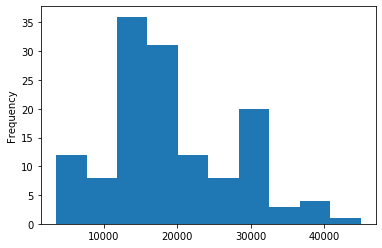

In [49]:
#执行两次
df.salary.plot(kind='hist')

### 33.绘制薪资水平密度曲线

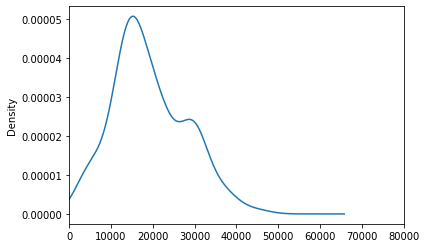

In [50]:
df.salary.plot(kind='kde',xlim=(0,80000))

### 34.删除最后一列categories

In [51]:
del df['categories']
# 等价于
df.drop(columns=['categories'], inplace=True)

,createTime,education,salary
0,03-16,本科,27500
1,03-16,本科,30000
2,03-16,不限,27500
3,03-16,本科,16500
4,03-16,本科,15000
...,...,...,...
130,03-16,本科,14000
131,03-16,硕士,37500
132,03-16,本科,30000
133,03-16,本科,19000


### 35.将df的第一列与第二列合并为新的一列

In [52]:
df['test'] = df['education']+df['createTime']
df

,createTime,education,salary,test
0,03-16,本科,27500,本科03-16
1,03-16,本科,30000,本科03-16
2,03-16,不限,27500,不限03-16
3,03-16,本科,16500,本科03-16
4,03-16,本科,15000,本科03-16
...,...,...,...,...
130,03-16,本科,14000,本科03-16
131,03-16,硕士,37500,硕士03-16
132,03-16,本科,30000,本科03-16
133,03-16,本科,19000,本科03-16


### 36.将education列与salary列合并为新的一列

In [53]:
#备注：salary为int类型，操作与35题有所不同
df["test1"] = df["salary"].map(str) + df['education']
df

,createTime,education,salary,test,test1
0,03-16,本科,27500,本科03-16,27500本科
1,03-16,本科,30000,本科03-16,30000本科
2,03-16,不限,27500,不限03-16,27500不限
3,03-16,本科,16500,本科03-16,16500本科
4,03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科
131,03-16,硕士,37500,硕士03-16,37500硕士
132,03-16,本科,30000,本科03-16,30000本科
133,03-16,本科,19000,本科03-16,19000本科


### 37.计算salary最大值与最小值之差

In [227]:
df[['salary']].apply(lambda x: x.max() - x.min())

salary    41500
dtype: int64

### 38.将第一行与最后一行拼接

In [55]:
pd.concat([df[:1], df[-2:-1]])

,createTime,education,salary,test,test1
0,03-16,本科,27500,本科03-16,27500本科
133,03-16,本科,19000,本科03-16,19000本科


### 39.将第8行数据添加至末尾

In [56]:
df.append(df.iloc[7])

,createTime,education,salary,test,test1
0,03-16,本科,27500,本科03-16,27500本科
1,03-16,本科,30000,本科03-16,30000本科
2,03-16,不限,27500,不限03-16,27500不限
3,03-16,本科,16500,本科03-16,16500本科
4,03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...,...
131,03-16,硕士,37500,硕士03-16,37500硕士
132,03-16,本科,30000,本科03-16,30000本科
133,03-16,本科,19000,本科03-16,19000本科
134,03-16,本科,30000,本科03-16,30000本科


### 40.查看每列的数据类型

In [57]:
df.dtypes

createTime    object
education     object
salary         int64
test          object
test1         object
dtype: object

### 41.将createTime列设置为索引

In [58]:
df.set_index("createTime")

,education,salary,test,test1
createTime,,,,
03-16,本科,27500,本科03-16,27500本科
03-16,本科,30000,本科03-16,30000本科
03-16,不限,27500,不限03-16,27500不限
03-16,本科,16500,本科03-16,16500本科
03-16,本科,15000,本科03-16,15000本科
...,...,...,...,...
03-16,本科,14000,本科03-16,14000本科
03-16,硕士,37500,硕士03-16,37500硕士
03-16,本科,30000,本科03-16,30000本科


### 42.生成一个和df长度相同的随机数dataframe

In [59]:
df1 = pd.DataFrame(pd.Series(np.random.randint(1, 10, 135)))
df1

,0
0,2
1,1
2,4
3,7
4,4
...,...
130,4
131,7
132,4
133,6


### 43.将上一题生成的dataframe与df合并

In [60]:
df= pd.concat([df,df1],axis=1)
df

,createTime,education,salary,test,test1,0
0,03-16,本科,27500,本科03-16,27500本科,2
1,03-16,本科,30000,本科03-16,30000本科,1
2,03-16,不限,27500,不限03-16,27500不限,4
3,03-16,本科,16500,本科03-16,16500本科,7
4,03-16,本科,15000,本科03-16,15000本科,4
...,...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科,4
131,03-16,硕士,37500,硕士03-16,37500硕士,7
132,03-16,本科,30000,本科03-16,30000本科,4
133,03-16,本科,19000,本科03-16,19000本科,6


### 44.生成新的一列new为salary列减去之前生成随机数列

In [62]:
df["new"] = df["salary"] - df[0]
df

,createTime,education,salary,test,test1,0,new
0,03-16,本科,27500,本科03-16,27500本科,2,27498
1,03-16,本科,30000,本科03-16,30000本科,1,29999
2,03-16,不限,27500,不限03-16,27500不限,4,27496
3,03-16,本科,16500,本科03-16,16500本科,7,16493
4,03-16,本科,15000,本科03-16,15000本科,4,14996
...,...,...,...,...,...,...,...
130,03-16,本科,14000,本科03-16,14000本科,4,13996
131,03-16,硕士,37500,硕士03-16,37500硕士,7,37493
132,03-16,本科,30000,本科03-16,30000本科,4,29996
133,03-16,本科,19000,本科03-16,19000本科,6,18994


### 45.检查数据中是否含有任何缺失值

In [63]:
df.isnull().values.any()

False

### 46.将salary列类型转换为浮点数

In [64]:
df['salary'].astype(np.float64)

0      27500.0
1      30000.0
2      27500.0
3      16500.0
4      15000.0
        ...   
130    14000.0
131    37500.0
132    30000.0
133    19000.0
134    30000.0
Name: salary, Length: 135, dtype: float64

### 47.计算salary大于10000的次数

In [65]:
len(df[df['salary']>10000])

119

### 48.查看每种学历出现的次数

In [66]:
df.education.value_counts()

本科    119
硕士      7
不限      5
大专      4
Name: education, dtype: int64

### 49.查看education列共有几种学历

In [67]:
df['education'].nunique()

4

### 50.提取salary与new列的和大于60000的最后3行

In [68]:
df1 = df[['salary','new']]
rowsums = df1.apply(np.sum, axis=1)
res = df.iloc[np.where(rowsums > 60000)[0][-3:], :]
res

,createTime,education,salary,test,test1,0,new
92,03-16,本科,35000,本科03-16,35000本科,8,34992
101,03-16,本科,37500,本科03-16,37500本科,2,37498
131,03-16,硕士,37500,硕士03-16,37500硕士,7,37493


## 第三期 金融数据处理

### 51.使用绝对路径读取本地Excel数据

In [70]:
#请将下面的路径替换为你存储数据的路径
data = pd.read_excel('/Users/Desktop/600000.SH.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


### 52.查看数据前三行

In [71]:
data.head(3)

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610,754425783,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11,1.865347e+10,6.5614
1,600000.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793,1034181474,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11,1.865347e+10,6.6204
2,600000.SH,浦发银行,2016-01-06,15.8618,15.8088,16.0208,15.6234,15.9855,46772653,838667398,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11,1.865347e+10,6.6720


### 53.查看每列数据缺失值情况

In [72]:
data.isnull().sum()

代码           1
简称           2
日期           2
前收盘价(元)      2
开盘价(元)       2
最高价(元)       2
最低价(元)       2
收盘价(元)       2
成交量(股)       2
成交金额(元)      2
涨跌(元)        2
涨跌幅(%)       2
均价(元)        2
换手率(%)       2
A股流通市值(元)    2
总市值(元)       2
A股流通股本(股)    2
市盈率          2
dtype: int64

### 54.提取日期列含有空值的行

In [73]:
data[data['日期'].isnull()]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
327,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,数据来源：Wind资讯,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 55.输出每列缺失值具体行数

In [74]:
for columname in data.columns:
    if data[columname].count() != len(data):
        loc = data[columname][data[columname].isnull().values==True].index.tolist()
        print('列名："{}", 第{}行位置有缺失值'.format(columname,loc))

列名："代码", 第[327]行位置有缺失值
列名："简称", 第[327, 328]行位置有缺失值
列名："日期", 第[327, 328]行位置有缺失值
列名："前收盘价(元)", 第[327, 328]行位置有缺失值
列名："开盘价(元)", 第[327, 328]行位置有缺失值
列名："最高价(元)", 第[327, 328]行位置有缺失值
列名："最低价(元)", 第[327, 328]行位置有缺失值
列名："收盘价(元)", 第[327, 328]行位置有缺失值
列名："成交量(股)", 第[327, 328]行位置有缺失值
列名："成交金额(元)", 第[327, 328]行位置有缺失值
列名："涨跌(元)", 第[327, 328]行位置有缺失值
列名："涨跌幅(%)", 第[327, 328]行位置有缺失值
列名："均价(元)", 第[327, 328]行位置有缺失值
列名："换手率(%)", 第[327, 328]行位置有缺失值
列名："A股流通市值(元)", 第[327, 328]行位置有缺失值
列名："总市值(元)", 第[327, 328]行位置有缺失值
列名："A股流通股本(股)", 第[327, 328]行位置有缺失值
列名："市盈率", 第[327, 328]行位置有缺失值


### 56.删除所有存在缺失值的行

In [75]:
'''
备注
axis：0-行操作（默认），1-列操作
how：any-只要有空值就删除（默认），all-全部为空值才删除
inplace：False-返回新的数据集（默认），True-在原数据集上操作
'''
data.dropna(axis=0, how='any', inplace=True)

### 57.绘制收盘价的折线图

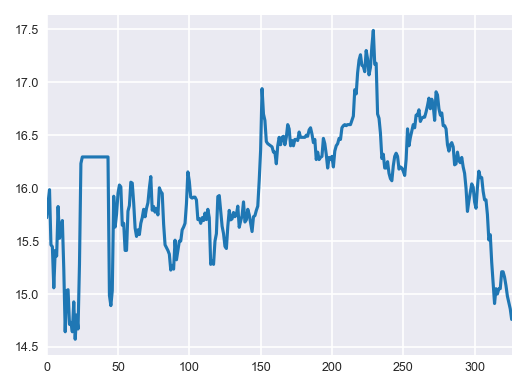

In [77]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') # 设置画图的风格
plt.rc('font',  size=6) #设置图中字体和大小
plt.rc('figure', figsize=(4,3), dpi=150) # 设置图的大小
data['收盘价(元)'].plot()

# 等价于
import matplotlib.pyplot as plt
plt.plot(df['收盘价(元)'])

### 58.同时绘制开盘价与收盘价

/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20803 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backe

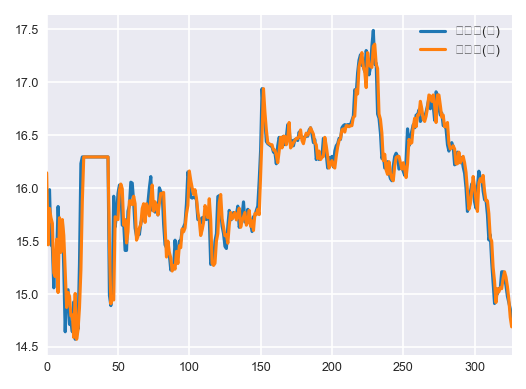

In [78]:
data[['收盘价(元)','开盘价(元)']].plot()

### 59.绘制涨跌幅的直方图

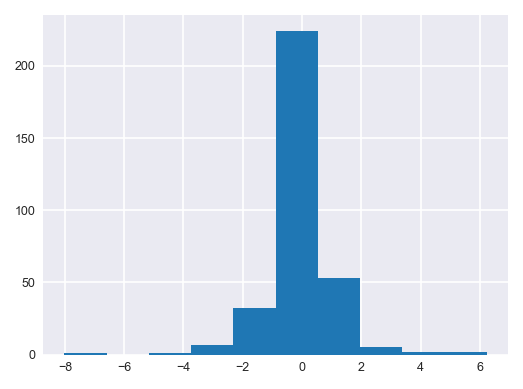

In [79]:
plt.hist(df['涨跌幅(%)'])
# 等价于
df['涨跌幅(%)'].hist()

### 60.让直方图更细致

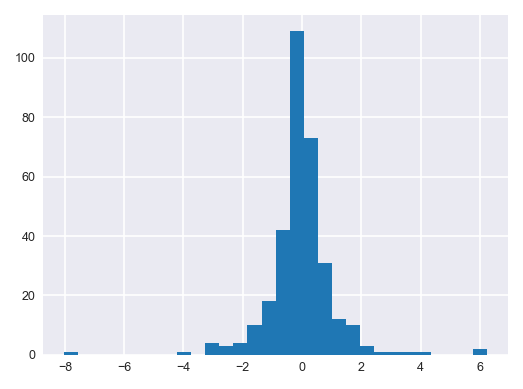

In [80]:
data['涨跌幅(%)'].hist(bins = 30)

### 61.以data的列名创建一个dataframe

In [81]:
temp = pd.DataFrame(columns = data.columns.to_list())

### 62.打印所有换手率不是数字的行

In [82]:
for i in range(len(data)):
    if type(data.iloc[i,13]) != float:
        temp = temp.append(data.loc[i])

temp

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
35,600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


### 63.打印所有换手率为--的行

In [84]:
data[data['换手率(%)'].isin(['--'])]

,代码,简称,日期,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
26,600000.SH,浦发银行,2016-02-16,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
27,600000.SH,浦发银行,2016-02-17,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
28,600000.SH,浦发银行,2016-02-18,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
29,600000.SH,浦发银行,2016-02-19,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
30,600000.SH,浦发银行,2016-02-22,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
31,600000.SH,浦发银行,2016-02-23,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
32,600000.SH,浦发银行,2016-02-24,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
33,600000.SH,浦发银行,2016-02-25,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
34,600000.SH,浦发银行,2016-02-26,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801
35,600000.SH,浦发银行,2016-02-29,16.2946,16.2946,16.2946,16.2946,16.2946,--,--,0.0,0.0,--,--,3.441565e+11,3.441565e+11,1.865347e+10,6.801


### 64.重置data的行号

In [85]:
data = data.reset_index()

### 65.删除所有换手率为非数字的行

In [86]:
k =[]
for i in range(len(data)):
    if type(data.iloc[i,13]) != float:
        k.append(i)
data.drop(labels=k,inplace=True)

### 66.绘制换手率的密度曲线

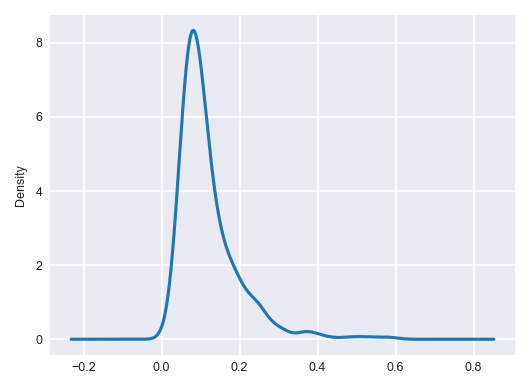

In [87]:
data['换手率(%)'].plot(kind='kde')

### 67.计算前一天与后一天收盘价的差值

In [88]:
data['收盘价(元)'].diff()

0         NaN
1      0.1413
2      0.1237
3     -0.5211
4     -0.0177
        ...  
322   -0.0800
323   -0.1000
324   -0.0600
325   -0.0600
326   -0.1000
Name: 收盘价(元), Length: 309, dtype: float64

### 68.计算前一天与后一天收盘价变化率

In [89]:
data['收盘价(元)'].pct_change()

0           NaN
1      0.008988
2      0.007799
3     -0.032598
4     -0.001145
         ...   
322   -0.005277
323   -0.006631
324   -0.004005
325   -0.004021
326   -0.006729
Name: 收盘价(元), Length: 309, dtype: float64

### 69.设置日期为索引

In [96]:
data = data.set_index('日期')

### 70.以5个数据作为一个数据滑动窗口，在这个5个数据上取均值(收盘价)

In [91]:
data['收盘价(元)'].rolling(5).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4      15.69578
         ...   
322    15.14200
323    15.12800
324    15.07000
325    15.00000
326    14.92000
Name: 收盘价(元), Length: 309, dtype: float64

### 71.以5个数据作为一个数据滑动窗口，计算这五个数据总和(收盘价)

In [92]:
data['收盘价(元)'].rolling(5).sum()

0          NaN
1          NaN
2          NaN
3          NaN
4      78.4789
        ...   
322    75.7100
323    75.6400
324    75.3500
325    75.0000
326    74.6000
Name: 收盘价(元), Length: 309, dtype: float64

### 72.将收盘价5日均线、20日均线与原始数据绘制在同一个图上

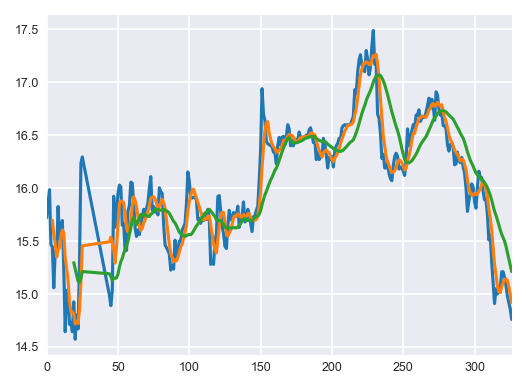

In [93]:
data['收盘价(元)'].plot()
data['收盘价(元)'].rolling(5).mean().plot()
data['收盘价(元)'].rolling(20).mean().plot()

### 73.按周为采样规则，取一周收盘价最大值

In [97]:
data['收盘价(元)'].resample('W').max()

日期
2016-01-10    15.9855
2016-01-17    15.8265
2016-01-24    15.6940
2016-01-31    15.0405
2016-02-07    16.2328
               ...   
2017-04-16    15.9700
2017-04-23    15.5600
2017-04-30    15.2100
2017-05-07    15.1600
2017-05-14    14.8600
Freq: W-SUN, Name: 收盘价(元), Length: 71, dtype: float64

### 74.绘制重采样数据与原始数据

/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


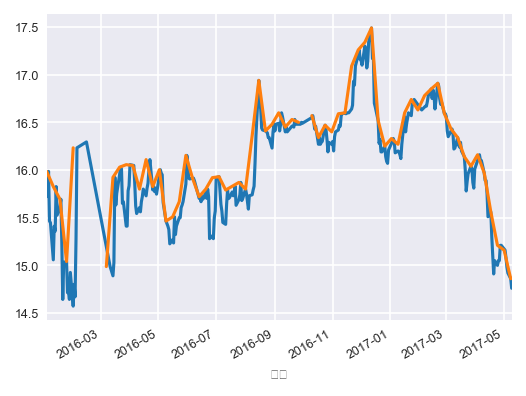

In [98]:
data['收盘价(元)'].plot()
data['收盘价(元)'].resample('7D').max().plot()

### 75.将数据往后移动5天

In [99]:
data.shift(5)

,index,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,317.0,600000.SH,浦发银行,15.00,15.02,15.10,14.99,15.05,12975919,195296862,0.05,0.3333,15.0507,0.06,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-04,318.0,600000.SH,浦发银行,15.05,15.06,15.11,15.00,15.05,14939871,225022668,0.00,0.0000,15.0619,0.0691,3.253551e+11,3.253551e+11,2.161828e+10,6.1273
2017-05-05,319.0,600000.SH,浦发银行,15.05,15.05,15.25,15.03,15.21,22887645,345791526,0.16,1.0631,15.1082,0.1059,3.288140e+11,3.288140e+11,2.161828e+10,6.1925


### 76.将数据向前移动5天

In [100]:
data.shift(-5)

,index,代码,简称,前收盘价(元),开盘价(元),最高价(元),最低价(元),收盘价(元),成交量(股),成交金额(元),涨跌(元),涨跌幅(%),均价(元),换手率(%),A股流通市值(元),总市值(元),A股流通股本(股),市盈率
日期,,,,,,,,,,,,,,,,,,
2016-01-04,5.0,600000.SH,浦发银行,15.4467,15.1994,15.4114,14.9786,15.0581,90177135,1550155933,-0.3886,-2.5157,17.1901,0.4834,3.180417e+11,3.180417e+11,1.865347e+10,6.2849
2016-01-05,6.0,600000.SH,浦发银行,15.0581,15.1641,15.4732,15.0846,15.4114,55374454,964061502,0.3533,2.3460,17.4099,0.2969,3.255031e+11,3.255031e+11,1.865347e+10,6.4324
2016-01-06,7.0,600000.SH,浦发银行,15.4114,15.5174,15.8088,15.3231,15.3584,47869312,843717365,-0.0530,-0.3438,17.6254,0.2566,3.243839e+11,3.243839e+11,1.865347e+10,6.4102
2016-01-07,8.0,600000.SH,浦发银行,15.3584,15.0140,15.8883,14.9168,15.8265,54838833,966117848,0.4681,3.0477,17.6174,0.294,3.342702e+11,3.342702e+11,1.865347e+10,6.6056
2016-01-08,9.0,600000.SH,浦发银行,15.8265,15.7205,16.0296,15.4732,15.5262,46723139,836146426,-0.3003,-1.8973,17.8958,0.2505,3.279280e+11,3.279280e+11,1.865347e+10,6.4803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 77.使用expending函数计算开盘价的移动窗口均值

In [101]:
data['开盘价(元)'].expanding(min_periods=1).mean()

日期
2016-01-04    16.144400
2016-01-05    15.804400
2016-01-06    15.805867
2016-01-07    15.784525
2016-01-08    15.761120
                ...    
2017-05-03    16.041489
2017-05-04    16.038314
2017-05-05    16.034769
2017-05-08    16.030695
2017-05-09    16.026356
Name: 开盘价(元), Length: 309, dtype: float64

### 78.绘制上一题的移动均值与原始数据折线图

/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/

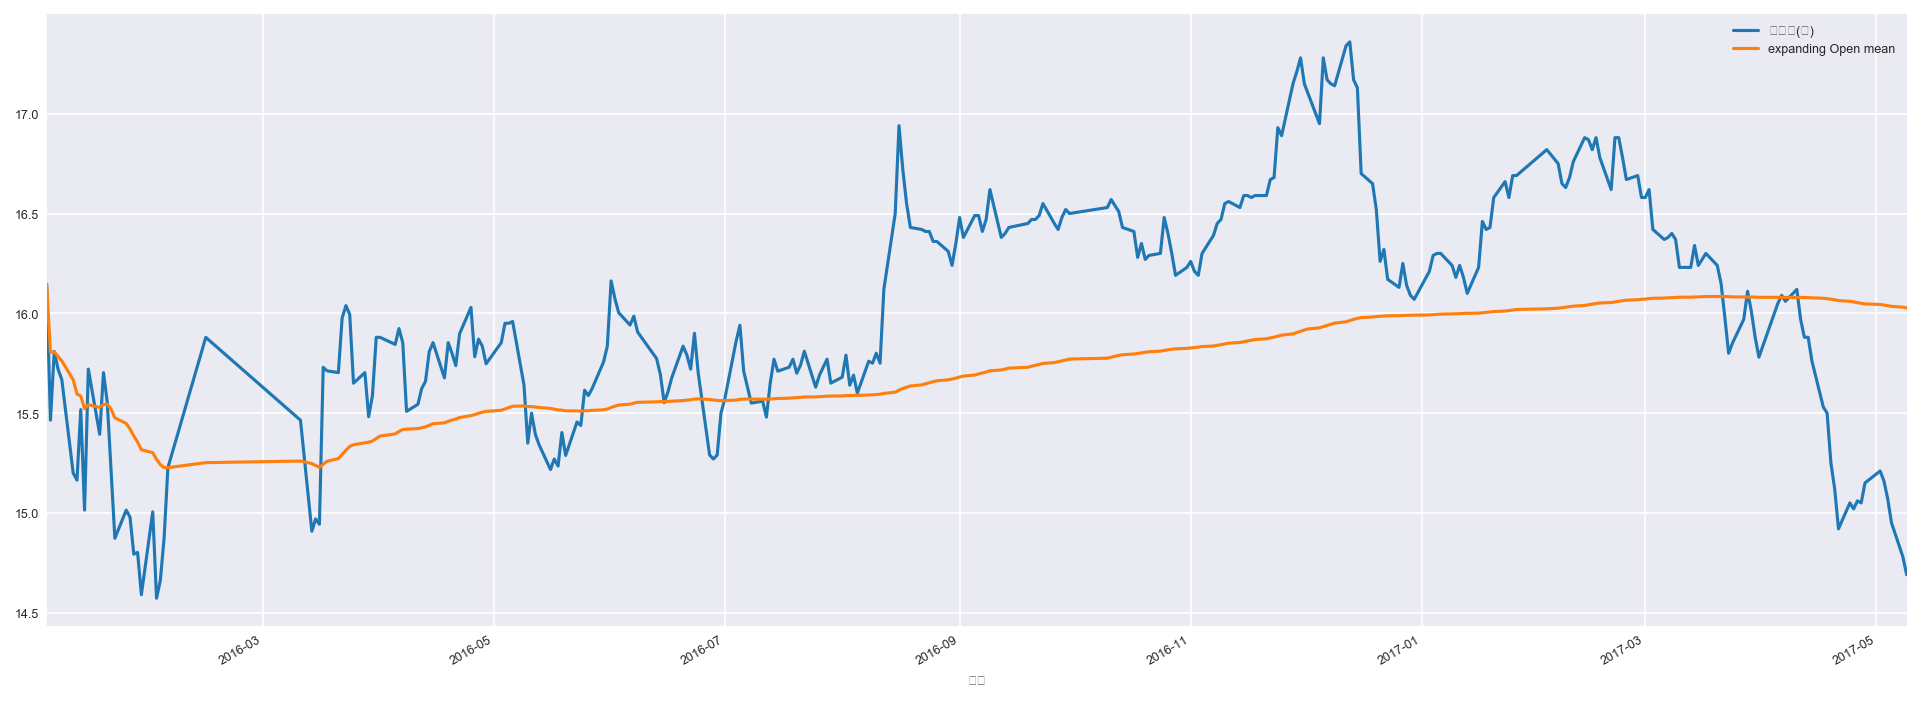

In [103]:
data['expanding Open mean']=data['开盘价(元)'].expanding(min_periods=1).mean()
data[['开盘价(元)', 'expanding Open mean']].plot(figsize=(16, 6))

### 79.计算布林指标

In [104]:
data['former 30 days rolling Close mean']=data['收盘价(元)'].rolling(20).mean()
data['upper bound']=data['former 30 days rolling Close mean']+2*data['收盘价(元)'].rolling(20).std()#在这里我们取20天内的标准差
data['lower bound']=data['former 30 days rolling Close mean']-2*data['收盘价(元)'].rolling(20).std()

### 80.计算布林线并绘制

/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25910 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anaconda/anaconda3/lib/python3.7/site-packages/matplotlib/backends/

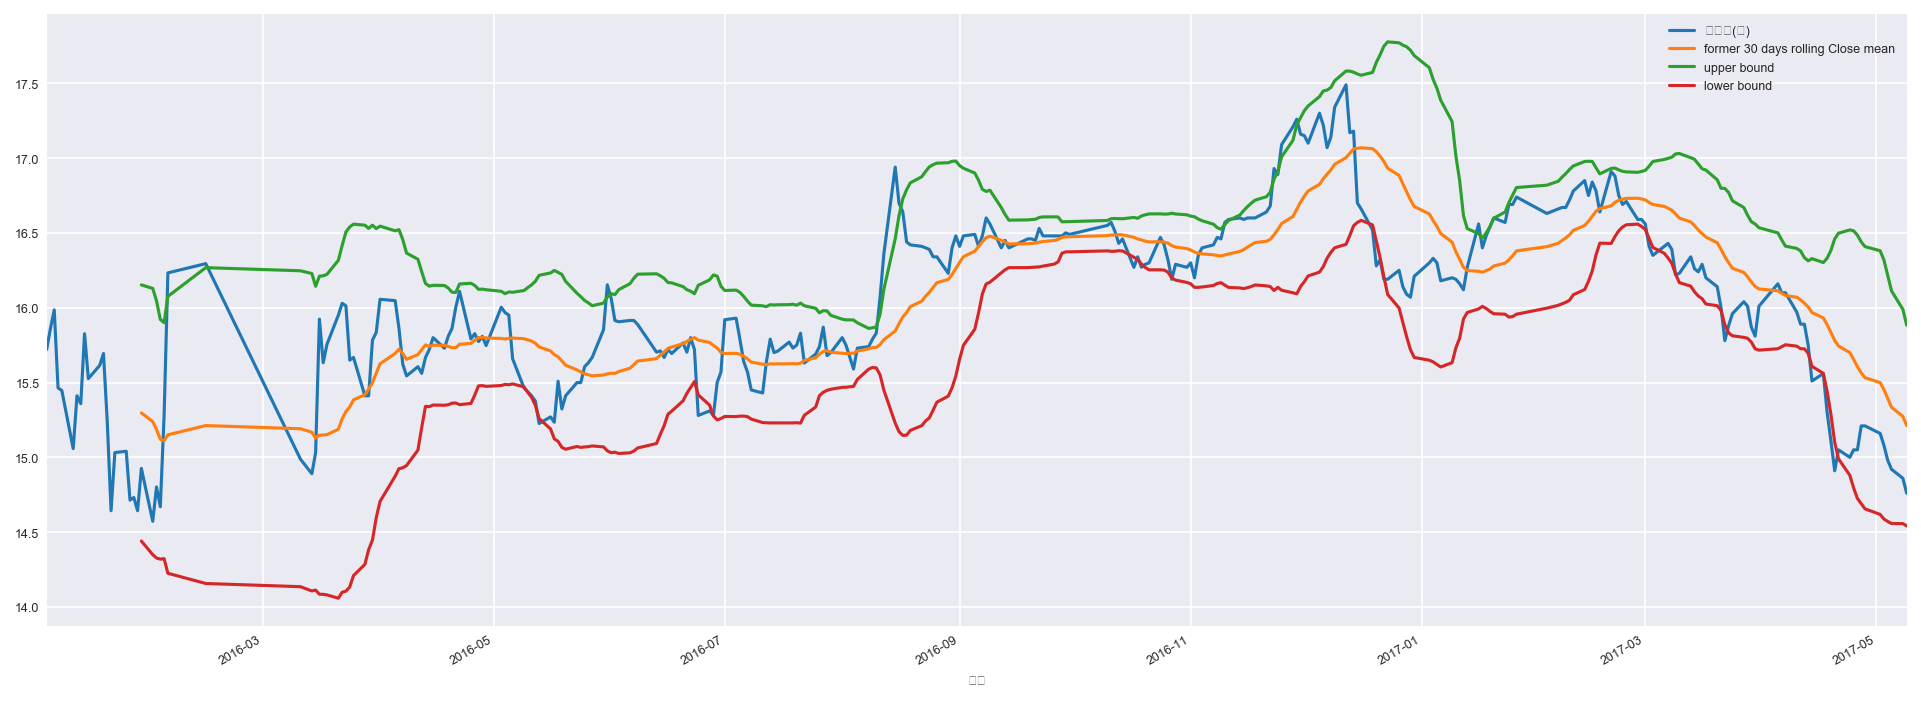

In [105]:
data[['收盘价(元)', 'former 30 days rolling Close mean','upper bound','lower bound' ]].plot(figsize=(16, 6))

## 第四期 当Pandas遇上NumPy

### 81.导入并查看pandas与numpy版本

In [106]:
import pandas as pd
import numpy as np
print(np.__version__)
print(pd.__version__)

1.17.2
0.25.3


### 82.从NumPy数组创建DataFrame

In [109]:
#备注 使用numpy生成20个0-100随机数
tem = np.random.randint(1,100,20)
df1 = pd.DataFrame(tem)
df1

,0
0,79
1,41
2,65
3,44
4,6
5,38
6,50
7,35
8,83
9,43


### 83.从NumPy数组创建DataFrame

In [110]:
#备注 使用numpy生成20个0-100固定步长的数
tem = np.arange(0,100,5)
df2 = pd.DataFrame(tem)
df2

,0
0,0
1,5
2,10
3,15
4,20
5,25
6,30
7,35
8,40
9,45


### 84.从NumPy数组创建DataFrame

In [112]:
#备注 使用numpy生成20个指定分布(如标准正态分布)的数
tem = np.random.normal(0, 1, 20)
df3 = pd.DataFrame(tem)
df3

,0
0,1.423127
1,1.558049
2,0.148458
3,1.435886
4,1.787797
5,0.815108
6,-1.307238
7,-1.348173
8,1.037712
9,2.264961


### 85.将df1，df2，df3按照行合并为新DataFrame

In [113]:
df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
df

,0
0,79.000000
1,41.000000
2,65.000000
3,44.000000
4,6.000000
5,38.000000
6,50.000000
7,35.000000
8,83.000000
9,43.000000


### 86.将df1，df2，df3按照列合并为新DataFrame

In [114]:
df = pd.concat([df1,df2,df3],axis=1,ignore_index=True)
df

,0,1,2
0,79,0,1.423127
1,41,5,1.558049
2,65,10,0.148458
3,44,15,1.435886
4,6,20,1.787797
5,38,25,0.815108
6,50,30,-1.307238
7,35,35,-1.348173
8,83,40,1.037712
9,43,45,2.264961


### 87.查看df所有数据的最小值、25%分位数、中位数、75%分位数、最大值

In [115]:
print(np.percentile(df, q=[0, 25, 50, 75, 100]))

[-1.34817283  1.41754194 23.5        50.         95.        ]


### 88.修改列名为col1,col2,col3

In [116]:
df.columns = ['col1','col2','col3']

### 89.提取第一列中不在第二列出现的数字

In [117]:
df['col1'][~df['col1'].isin(df['col2'])]

0     79
1     41
3     44
4      6
5     38
8     83
9     43
11    14
12    58
13    13
15    27
16    17
17    22
18    48
19    42
Name: col1, dtype: int64

### 90.提取第一列和第二列出现频率最高的三个数字

In [118]:
temp = df['col1'].append(df['col2'])
temp.value_counts().index[:3]

Int64Index([65, 55, 50], dtype='int64')

### 91.提取第一列中可以整除5的数字位置

In [119]:
np.argwhere(df['col1'] % 5==0)

/Users/anaconda/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


array([[ 2],
       [ 6],
       [ 7],
       [10],
       [14]])

### 92.计算第一列数字前一个与后一个的差值

In [120]:
df['col1'].diff().tolist()

[nan,
 -38.0,
 24.0,
 -21.0,
 -38.0,
 32.0,
 12.0,
 -15.0,
 48.0,
 -40.0,
 12.0,
 -41.0,
 44.0,
 -45.0,
 32.0,
 -18.0,
 -10.0,
 5.0,
 26.0,
 -6.0]

### 93.将col1,col2,clo3三列顺序颠倒

In [121]:
df.ix[:, ::-1]

/Users/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/anaconda/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


,col3,col2,col1
0,1.423127,0,79
1,1.558049,5,41
2,0.148458,10,65
3,1.435886,15,44
4,1.787797,20,6
5,0.815108,25,38
6,-1.307238,30,50
7,-1.348173,35,35
8,1.037712,40,83
9,2.264961,45,43


### 94.提取第一列位置在1,10,15的数字

In [122]:
df['col1'].take([1,10,15])
# 等价于
df.iloc[[1,10,15],0]

1     41
10    55
15    27
Name: col1, dtype: int64

### 95.查找第一列的局部最大值位置

In [123]:
#备注 即比它前一个与后一个数字的都大的数字
tem = np.diff(np.sign(np.diff(df['col1'])))
np.where(tem == -2)[0] + 1

array([ 2,  6,  8, 10, 12, 14, 18])

### 96.按行计算df的每一行均值

In [124]:
df[['col1','col2','col3']].mean(axis=1)

0     26.807709
1     15.852683
2     25.049486
3     20.145295
4      9.262599
5     21.271703
6     26.230921
7     22.883942
8     41.345904
9     30.088320
10    34.774255
11    23.256581
12    39.485689
13    25.635775
14    38.931544
15    34.466929
16    32.293192
17    35.257769
18    45.725352
19    45.789433
dtype: float64

### 97.对第二列计算移动平均值

In [125]:
#备注 每次移动三个位置，不可以使用自定义函数

np.convolve(df['col2'], np.ones(3)/3, mode='valid')

array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65.,
       70., 75., 80., 85., 90.])

### 98.将数据按照第三列值的大小升序排列

In [126]:
df.sort_values("col3",inplace=True)

### 99.将第一列大于50的数字修改为'高'

In [127]:
df.col1[df['col1'] > 50]= '高'

/Users/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 100.计算第二列与第三列之间的欧式距离

In [131]:
np.linalg.norm(df['col2']-df['col3'])

247.80470977803168

## 第五期 一些补充

### 101.从CSV文件中读取指定数据

In [133]:
#备注 从数据1中的前10行中读取positionName, salary两列

df = pd.read_csv('数据1.csv',encoding='gbk', usecols=['positionName', 'salary'],nrows = 10)
df

,positionName,salary
0,数据分析,37500
1,数据建模,15000
2,数据分析,3500
3,数据分析,45000
4,数据分析,30000
5,数据分析,50000
6,数据分析,30000
7,数据建模工程师,35000
8,数据分析专家,60000
9,数据分析师,40000


### 102.从CSV文件中读取指定数据

In [134]:
#备注 从数据2中读取数据并在读取数据时将薪资大于10000的为改为高

df = pd.read_csv('数据2.csv',converters={'薪资水平': lambda x: '高' if float(x) > 10000 else '低'} )
df

,学历要求,薪资水平
0,本科,高
1,硕士,高
2,本科,低
3,本科,高
4,不限,高
...,...,...
1149,硕士,高
1150,本科,高
1151,本科,高
1152,本科,高


### 103.从上一题数据中，对薪资水平列每隔20行进行一次抽样

In [135]:
df.iloc[::20, :][['薪资水平']]

,薪资水平
0,高
20,高
40,高
60,高
80,高
100,高
120,高
140,高
160,高
180,高


### 104.将数据取消使用科学计数法

In [137]:
#输入
df = pd.DataFrame(np.random.random(10)**10, columns=['data'])
df

,data
0,6.006718e-01
1,1.152194e-07
2,1.611162e-13
3,3.061740e-01
4,1.512660e-05
5,4.206163e-01
6,1.344766e-01
7,4.970202e-07
8,4.707315e-01
9,7.739988e-02


In [138]:
df.round(3)

,data
0,0.601
1,0.000
2,0.000
3,0.306
4,0.000
5,0.421
6,0.134
7,0.000
8,0.471
9,0.077


### 105.将上一题的数据转换为百分数

In [139]:
df.style.format({'data': '{0:.2%}'.format})

,data
0,60.07%
1,0.00%
2,0.00%
3,30.62%
4,0.00%
5,42.06%
6,13.45%
7,0.00%
8,47.07%
9,7.74%


### 106.查找上一题数据中第3大值的行号

In [140]:
df['data'].argsort()[::-1][7]

5

### 107.反转df的行

In [141]:
df.iloc[::-1, :]

,data
9,7.739988e-02
8,4.707315e-01
7,4.970202e-07
6,1.344766e-01
5,4.206163e-01
4,1.512660e-05
3,3.061740e-01
2,1.611162e-13
1,1.152194e-07
0,6.006718e-01


### 108.按照多列对数据进行合并

In [142]:
#输入
df1= pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

df2= pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [143]:
pd.merge(df1, df2, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


### 109.按照多列对数据进行合并

In [144]:
pd.merge(df1, df2, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


### 110.再次读取数据1并显示所有的列

In [145]:
df = pd.read_csv('数据1.csv',encoding='gbk')
pd.set_option("display.max.columns", None)
df

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany
0,6802721,数据分析,475770,i/image2/M01/B7/3E/CgoB5lwPfEaAdn8WAABWQ0Jgl5s...,50-150人,"移动互联网,电商",A轮,"['绩效奖金', '带薪年假', '定期体检', '弹性工作']",产品|需求|项目类,数据分析,数据分析,"['SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']","['电商', '社交', 'SQL', '数据库', '数据运营', 'BI']",2020/3/16 11:00,11:00发布,余杭区,['仓前'],37500,1-3年,全职,本科,五险一金、弹性工作、带薪年假、年度体检,today,2020/3/16 11:00,12022406,1,NaN,NaN,NaN,30.278421,120.005922,NaN,50,1,233,0,15.101875,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
1,5204912,数据建模,50735,image1/M00/00/85/CgYXBlTUXeeAR0IjAABbroUk-dw97...,150-500人,电商,B轮,"['年终奖金', '做五休二', '六险一金', '子女福利']",开发|测试|运维类,数据开发,建模,"['算法', '数据架构']","['算法', '数据架构']",[],2020/3/16 11:08,11:08发布,滨江区,"['西兴', '长河']",15000,3-5年,全职,本科,"六险一金,定期体检,丰厚年终",disabled,2020/3/16 11:08,5491688,1,NaN,NaN,NaN,30.188041,120.201179,NaN,23,1,176,0,32.559414,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
2,6877668,数据分析,100125,image2/M00/0C/57/CgqLKVYcOA2ADcFuAAAE8MukIKA74...,2000人以上,"移动互联网,企业服务",上市公司,"['节日礼物', '年底双薪', '股票期权', '带薪年假']",产品|需求|项目类,数据分析,数据分析,"['数据库', '数据分析', 'SQL']","['数据库', 'SQL']",[],2020/3/16 10:33,10:33发布,江干区,"['四季青', '钱江新城']",3500,1-3年,全职,本科,五险一金 周末双休 不加班 节日福利,today,2020/3/16 10:33,5322583,1,4号线,江锦路,4号线_城星路;4号线_市民中心;4号线_江锦路,30.241521,120.212539,NaN,11,4,80,0,14.972357,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
3,6496141,数据分析,26564,i/image2/M01/F7/3F/CgoB5lyGAQGAZeI-AAAdOqXecnw...,500-2000人,电商,D轮及以上,"['生日趴', '每月腐败基金', '每月补贴', '年度旅游']",开发|测试|运维类,数据开发,数据分析,[],['电商'],['电商'],2020/3/16 10:10,10:10发布,江干区,NaN,45000,3-5年,全职,本科,年终奖等,threeDays,2020/3/16 10:10,9814560,1,1号线,文泽路,1号线_文泽路,30.299404,120.350304,NaN,100,1,68,0,12.874153,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True
4,6467417,数据分析,29211,i/image2/M01/77/B8/CgoB5l1WDyGATNP5AAAlY3h88SY...,2000人以上,物流丨运输,上市公司,"['技能培训', '免费班车', '专项奖金', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['BI', '数据分析', '数据运营']","['BI', '数据运营']",[],2020/3/16 09:56,09:56发布,余杭区,['仓前'],30000,3-5年,全职,大专,五险一金,disabled,2020/3/16 09:56,6392394,1,NaN,NaN,NaN,30.282952,120.009765,NaN,20,1,66,0,12.755375,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,6884346,数据分析师,21236,i/image/M00/43/F6/CgqKkVeEh76AUVPoAAA2Bj747wU6...,500-2000人,"移动互联网,医疗丨健康",C轮,"['技能培训', '年底双薪', '节日礼物', '绩效奖金']",产品|需求|项目类,数据分析,数据分析,"['数据库', '商业', '数据分析', 'SQL']","['医疗健康', '数据库', '商业', '数据分析', 'SQL']","['医疗健康', '数据库', '商业', '数据分析', 'SQL']",2020/3/11 16:45,2020/3/11,萧山区,NaN,25000,3-5年,全职,不限,大牛老板，开放环境，民生行业，龙头公司,threeDays,2020/3/16 09:49,1665167,1,NaN,NaN,NaN,30.203078,120.247069,NaN,96,1,0,0,0.314259,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
101,6849100,商业数据分析,72076,i/image2/M01/92/A4/CgotOV2LPUmAR_8dAAB_DlDMiXA...,500-2000人,"移动互联网,电商",C轮,"['节日礼物', '股票期权', '带薪年假', '年度旅游']",市场|商务类,市场|营销,商业数据分析,"['市场', '数据分析', '行业分析', '市场分析']","['电商', '市场', '数据分析', '行业分析', '市场分析']","['电商', '市场', '数据分析', '行业分析', '市场分析']",2020/3/14 17:38,2天前发布,余杭区,NaN,35000,1-3年,全职,硕士,五险一金、带薪休假,threeDays,2020/3/14 17:38,1732416,1,NaN,NaN,NaN,30.276694,119.990918,NaN,2,3,0,0,0.283276,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False
102,6803432,奔驰·耀出行-BI数据分析专家,751158,i/image3/M01/64/93/Cgq2xl48z2mAeYRoAAD6Qf_Jeq8...,150-500人,移动互联网,不需要融资,[],开发|测试|运维类,数据开发,数据分析,"['MySQL', '数据处理', '数据分析']","['MySQL', '数据处理', '数据分析']",[],202

### 111.查找secondType与thirdType值相等的行号

In [146]:
np.where(df.secondType == df.thirdType)

(array([  0,   2,   4,   5,   6,  10,  14,  23,  25,  27,  28,  29,  30,
         33,  37,  38,  39,  40,  41,  48,  49,  52,  53,  55,  57,  61,
         65,  66,  67,  71,  73,  74,  75,  79,  80,  82,  85,  88,  89,
         91,  96, 100]),)

### 112.查找薪资大于平均薪资的第三个数据

In [147]:
np.argwhere(df['salary'] > df['salary'].mean())[2]

array([5])

### 113.将上一题数据的salary列开根号

In [148]:
df[['salary']].apply(np.sqrt)

,salary
0,193.649167
1,122.474487
2,59.160798
3,212.132034
4,173.205081
...,...
100,158.113883
101,187.082869
102,173.205081
103,141.421356


### 114.将上一题数据的linestaion列按_拆分

In [150]:
df['split'] = df['linestaion'].str.split('_')

### 115.查看上一题数据中一共有多少列

In [151]:
df.shape[1]

54

### 116.提取industryField列以'数据'开头的行

In [153]:
df[df['industryField'].str.startswith('数据')]

,positionId,positionName,companyId,companyLogo,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,skillLables,positionLables,industryLables,createTime,formatCreateTime,district,businessZones,salary,workYear,jobNature,education,positionAdvantage,imState,lastLogin,publisherId,approve,subwayline,stationname,linestaion,latitude,longitude,hitags,resumeProcessRate,resumeProcessDay,score,newScore,matchScore,matchScoreExplain,query,explain,isSchoolJob,adWord,plus,pcShow,appShow,deliver,gradeDescription,promotionScoreExplain,isHotHire,count,aggregatePositionIds,famousCompany,split
8,6458372,数据分析专家,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,其他数据分析,"['数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']","['电商', '广告营销', '数据分析', '数据运营']",2020/3/16 10:57,10:57发布,余杭区,NaN,60000,5-10年,全职,本科,六险一金、境内外旅游、带薪年假、培训发展,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,24,0,1.141952,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
10,6804629,数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",产品|需求|项目类,数据分析,数据分析,['数据分析'],"['电商', '广告营销', '数据分析']","['电商', '广告营销', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,不限,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,17,0,1.161869,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
13,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,30000,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,16,0,1.075559,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
21,6267370,数据分析专家,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w50...,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",开发|测试|运维类,数据开发,数据分析,"['数据挖掘', '数据分析']","['数据挖掘', '数据分析']",[],2020/3/16 11:16,11:16发布,滨江区,NaN,20000,5-10年,全职,本科,五险一金,today,2020/3/16 11:16,466738,1,4号线,中医药大学,4号线_中医药大学;4号线_联庄,30.185480,120.139320,NaN,43,1,7,0,1.290228,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,"[4号线, 中医药大学;4号线, 联庄]"
32,6804489,资深数据分析师,34132,i/image2/M01/F8/DE/CgoB5lyHTJeAP7v9AAFXUt4zJo4...,150-500人,"数据服务,广告营销",A轮,"['开放式办公', '扁平管理', '带薪假期', '弹性工作时间']",开发|测试|运维类,数据开发,数据分析,['数据分析'],"['电商', '数据分析']","['电商', '数据分析']",2020/3/16 10:57,10:57发布,余杭区,NaN,37500,3-5年,全职,本科,六险一金 旅游 带薪年假 培训发展 双休,today,2020/3/16 09:51,7542546,1,NaN,NaN,NaN,30.281850,120.015690,NaN,83,1,16,0,1.075712,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
37,6242470,数据分析师,31544,image1/M00/00/48/CgYXBlTUXOaADKooAABjQoD_n1w50...,150-500人,数据服务,不需要融资,"['专业红娘牵线', '节日礼物', '技能培训', '岗位晋升']",产品|需求|项目类,数据分析,数据分析,"['增长黑客', '数据分析', '商业']","['增长黑客', '数据分析', '商业']",[],2020/3/16 11:16,11:16发布,滨江区,NaN,22500,1-3年,全职,本科,五险一金,today,2020/3/16 11:16,466738,1,4号线,中医药大学,4号线_中医药大学;4号线_联庄,30.185480,120.139320,NaN,43,1,5,0,1.060218,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,"[4号线, 中医药大学;4号线, 联庄]"
50,6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ...,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,数据分析师,"['需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']",2020/3/16 10:49,10:49发布,西湖区,NaN,27500,3-5年,全职,不限,阿里系创业、云计算生态、餐补、双休,today,2020/3/16 10:49,3859261,1,NaN,NaN,NaN,30.289482,120.067080,NaN,1,1,5,0,0.947202,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,0,0,[],False,NaN
63,6680900,数据分析师 (MJ000250),114335,i/image2/M00/17/C2/CgoB5ln5lUuAM8oSAADO2Rz54hQ...,150-500人,数据服务,B轮,"['股票期权', '弹性工作', '领导好', '五险一金']",产品|需求|项目类,产品经理,数据分析师,"['需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']","['企业服务', '大数据', '需求分析', '数据']",2020/3/16 10:49,10:49发布,西湖区,NaN,27500,3-5年,全职,不限,阿里系创业、云计算生态、餐补、双休,today,2020/3/16 10:49,3859261,1,NaN,NaN,NaN,30.289482,120.067080,NaN,1,1,4,0,0.856464,NaN,NaN,NaN,0,0

### 117.按列制作数据透视表

In [155]:
pd.pivot_table(df,values=["salary","score"],index="positionId")

,salary,score
positionId,,
5203054,30000,4.0
5204912,15000,176.0
5269002,37500,1.0
5453691,30000,4.0
5519962,37500,14.0
...,...,...
6882983,27500,15.0
6884346,25000,0.0
6886661,37500,5.0


### 118.同时对salary、score两列进行计算

In [156]:
df[["salary","score"]].agg([np.sum,np.mean,np.min])

,salary,score
sum,3.331000e+06,1335.000000
mean,3.172381e+04,12.714286
amin,3.500000e+03,0.000000


### 119.对salary求平均，对score列求和

In [157]:
df.agg({"salary":np.sum,"score":np.mean})

salary    3.331000e+06
score     1.271429e+01
dtype: float64

### 120.计算并提取平均薪资最高的区

In [158]:
df[['district','salary']].groupby(by='district').mean().sort_values('salary',ascending=False).head(1)

,salary
district,
萧山区,36250.0
